# DBScan and K-Means Clustering

## Theoretical Discussion

As we start our tour of unsupervised learning algorithms, a natural starting spot is clustering. Within unsupervised learning, we have seen many types of classification that all rely on some prior knowledge. For example, in the famous Iris dataset, the machine learning models we have encountered relies on previous inteligence, humans, to identify which flowers are which species. This is analogous to a student gaining inteligence from a teacher. This is why we call those methods supervised. As you may be able to anticipate, there's a need for ML algorithms to do even more than learn from a teacher. Just like natural intelligence, we would like artificial inteligence to be able to recognize patterns all on its own. Similar to classification, clustering is able to take data and sort it into groups, but without any indication of what the groups are!

With clustering, a whole new type of learning is unlocked. Let's take a look at a more compregensive summary of what clustering does under the hood and two algorithms: DBScan and K-Means.

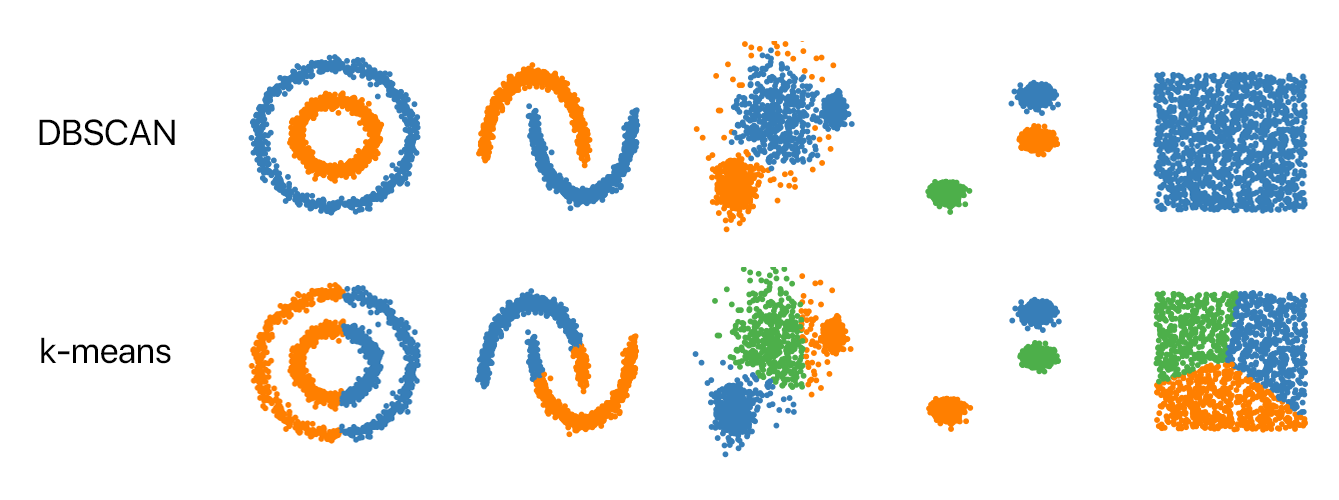

Visual from https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5

The goal of clustering is to partition a set of data points into groups or clusters, such that data points within a cluster are more similar to each other than to data points in other clusters. Clustering is an unsupervised learning technique, which means that it does not require labeled data to learn from.

Where is clustering used?
Clustering is used in a variety of fields, including data analysis, image segmentation, social network analysis, market segmentation, and anomaly detection. In data analysis, clustering can be used to identify patterns in customer behavior or to group similar products together. In image segmentation, clustering can be used to identify regions in an image that have similar color or texture. In social network analysis, clustering can be used to identify communities or groups of users with similar interests. In market segmentation, clustering can be used to group customers based on their purchasing behavior. In anomaly detection, clustering can be used to identify unusual patterns or outliers in a dataset.

How do DBSCAN and K-means clustering algorithms work?
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and K-means are two popular clustering algorithms. Here's a brief explanation of how each of them works:

DBSCAN: DBSCAN is a density-based clustering algorithm that groups data points based on their density. The algorithm starts with a randomly selected point and identifies all the points within a specified radius (epsilon) from that point. If the number of points within that radius is greater than a specified threshold (minPts), then those points are considered part of a cluster. The algorithm repeats this process for all the points in the dataset, identifying clusters of points with high density and separating points that are not part of any cluster.

K-means: K-means is a centroid-based clustering algorithm that groups data points into K clusters, where K is a user-specified parameter. The algorithm starts by randomly selecting K points as the initial centroids for each cluster. Each data point is then assigned to the cluster whose centroid is closest to it. The algorithm then recalculates the centroids based on the mean of all the data points in each cluster. The process is repeated until the centroids no longer change or a maximum number of iterations is reached.

Both DBSCAN and K-means have their strengths and weaknesses, and the choice of algorithm depends on the specific problem you are trying to solve and the characteristics of your dataset.

## Application and Analysis

Let's once again take a look at some data from our college basketball dataset.

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import sklearn as sk

In [6]:
url = r"https://raw.githubusercontent.com/joshyaffee/A-First-Semester-of-Machine-Learning---INDE-577/main/Datasets/cbb.csv"
df = pd.read_csv(url)

df = df.dropna()
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


Here, we show 1-, 12-, and 16-seeds'ADJOE and BARTHAG scores on the x- and y-axes, respectively. Suppose seeds didn't exist but we think there is a pattern to be observed.

This pattern could of course end up being very informative if it groups teams by seed, since the machine would then be learning which teams were elite, which teams were significantly worse, but still good enough to upset some of the best teams, and which teams barely stand a chance. 

The point is, this is a bit of a silly example, but worthy enough to make for a good demonstration of clustering.

In [7]:
df2 = df[df['SEED'].isin([1, 12, 16])]

# x = df2['ADJOE']
# y = df2['BARTHAG']
# labels = df2['TEAM']
# color = df2['SEED']

# # create a dataframe using x, y, label, and color series
# plotting_df = pd.DataFrame({'ADJOE': x, 'BARTHAG': y, 'labels': labels, 'color': color})

# create a scatter plot using plotly express
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', hover_data=['TEAM'], color='SEED')

# show the plot
fig.show()

In [8]:
from sklearn.cluster import DBSCAN

# generate some sample data
np.random.seed(123)
X = df2.loc[:, ['ADJOE', 'BARTHAG']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# fit DBSCAN clustering model
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X_normalized_df)
labels = dbscan.fit_predict(X_normalized_df)

# create a scatter plot of the data colored by the cluster labels
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', color=labels, hover_data=['TEAM'])
fig.show()

And the results look great! One intended cluster was split into 2, but perhaps this provides extra information. Now, let's take a look at the same data for K-means.

In [9]:
from sklearn.cluster import KMeans

# generate some sample data
np.random.seed(123)
X = df2.loc[:, ['ADJOE', 'BARTHAG']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# fit KMeans clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_standardized_df)
labels = kmeans.predict(X_standardized_df)

# create a scatter plot of the data colored by the cluster labels
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', color=labels, hover_data=['TEAM'])
fig.show()


This also seems almost perfect, but upon closer inspection, we see that K-means is worse at identifying teams on the border of two clusters like Wyoming or Davidson.

Note that I had to scale the data to make these clustering algorithms work well since ADJOE has a range of ~40 and Barthag had a range less than 1. Let's see what happens in each model if we neglect to normalize the data. I'll still try to find a reasonable value for epsilon, but i won't touch any other parameters.

In [10]:
from sklearn.cluster import DBSCAN

# generate some sample data
np.random.seed(123)
X = df2.loc[:, ['ADJOE', 'BARTHAG']]

# fit DBSCAN clustering model
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)
labels = dbscan.fit_predict(X)

# create a scatter plot of the data colored by the cluster labels
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', color=labels, hover_data=['TEAM'])
fig.show()

In [11]:
from sklearn.cluster import KMeans

# generate some sample data
np.random.seed(123)
X = df2.loc[:, ['ADJOE', 'BARTHAG']]

# fit KMeans clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# create a scatter plot of the data colored by the cluster labels
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', color=labels, hover_data=['TEAM'])
fig.show()

As you can see, BARTHAG becomes a nonfactor in identifying the clusters in both models, but K-means is much more resilient to the data scientist's mistake. 

##Bonus algorithm

While I was in class learning about K-means and DBScan, I wondered how we can relate clustering to graphs. Since we are so concerned with the distance between two points, we can model the data points as vertices and distances as edge weights in a complete graph. This type of graph is seen very often within Graoh Theory and Operations Research. For example, the famous Traveling Salesman Problem is formulated on a graph like this. So, I wondered how we can relate the idea of a cluster to a subset of the vertex set. The natural conclusion was through connected components. So, I wondered if we could terminate Kruskal's algorithm early (either based on number of components or based on a distance cutoff) to create a clustering algorithm that can compete with the two above. 

I'll have ChatGPT explain Kruskal's algorithm here: 

Kruskal's algorithm is a greedy algorithm for finding the minimum spanning tree (MST) of a connected, weighted graph. A spanning tree of a graph is a tree that includes all of the graph's vertices, while a minimum spanning tree is a spanning tree that has the minimum possible total edge weight.

Kruskal's algorithm works as follows:

Sort the edges of the graph by weight in non-descending order.
Initialize an empty set of edges (i.e., the MST).
For each edge in the sorted list of edges:
If adding the edge to the MST would not create a cycle, add the edge to the MST.
Otherwise, discard the edge.
Return the set of edges that form the MST.
To check whether adding an edge to the MST would create a cycle, Kruskal's algorithm uses a disjoint-set data structure to keep track of the connected components of the graph. Initially, each vertex is in its own connected component, and each connected component is represented by a separate set. When two connected components are joined by adding an edge between them, the two sets are merged.

Kruskal's algorithm has a time complexity of O(E log E), where E is the number of edges in the graph, due to the need to sort the edges by weight. However, with a suitable data structure for maintaining the sorted edges, such as a binary heap or a Fibonacci heap, the time complexity can be reduced to O(E log V), where V is the number of vertices in the graph. Kruskal's algorithm is a simple and efficient algorithm for finding the minimum spanning tree of a graph.

Let's modify that algorithm to stop when there are k connected components or when an edge of epsilon distance or greater is supposed to be added:

In [12]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def cost(x1, x2):
    return euclidean_distance(x1, x2)

def find(edge, parents):
    if parents[edge] == edge:
        return edge
    return find(parents[edge], parents)

def merge(edge, parents, ranks):
    root1 = find(edge[0], parents)
    root2 = find(edge[1], parents)
    if root1 == root2:
        return
    if ranks[root1] < ranks[root2]:
        parents[root1] = root2
    elif ranks[root1] > ranks[root2]:
        parents[root2] = root1
    else:
        parents[root1] = root2
        ranks[root2] += 1

def cut_off_edges(edges, epsilon):
    return [edge for edge in edges if edge[2] < epsilon]

def kruskal_clustering(df, k = None, epsilon = None):
    n = df.shape[0]
    edges = []
    for i in range(n):
        for j in range(i+1, n):
            edges.append((i, j, cost(df.iloc[i], df.iloc[j])))
    edges.sort(key=lambda x: x[2])
    if epsilon is not None:
        edges = cut_off_edges(edges, epsilon)
    parents = list(range(n))
    ranks = [0] * n
    components = n
    for edge in edges:
        if components == k and k is not None:
            break
        if find(edge[0], parents) != find(edge[1], parents):
            merge(edge, parents, ranks)
            components -= 1
    clusters = {}
    for i in range(n):
        root = find(i, parents)
        if root not in clusters:
            clusters[root] = []
        clusters[root].append(i)
    return clusters, n

def postprocess(clusters, n):
    roots = clusters.keys()
    colors = {ck : i for i, ck in enumerate(roots)}

    labels = -1 * np.ones(n)
    for root, nodelst in clusters.items():
        color = colors[root]
        for node in nodelst:
            labels[node] = color
    return labels

In [13]:
X = df2.loc[:, ['ADJOE', 'BARTHAG']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

labels = postprocess(*kruskal_clustering(X_standardized_df, k = 3))

# create a scatter plot of the data colored by the cluster labels
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', color=labels, hover_data=['TEAM'])
fig.show()

And we crash and burn as the outliers want to have their own connected component. First let's try increasing k.

In [14]:
X = df2.loc[:, ['ADJOE', 'BARTHAG']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

labels = postprocess(*kruskal_clustering(X_standardized_df, k = 8))

# create a scatter plot of the data colored by the cluster labels
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', color=labels, hover_data=['TEAM'])
fig.show()

Not horrible for something I dreamed up in the middle of class. Now, let's try terminating the algorithm when the distance exceeds some epsilon.

In [15]:
labels = postprocess(*kruskal_clustering(X_standardized_df, epsilon = .35))

# create a scatter plot of the data colored by the cluster labels
fig = px.scatter(df2, x='ADJOE', y='BARTHAG', color=labels, hover_data=['TEAM'])
fig.show()

Not too shabby. Of course, K-Means and DBScan have been battle tested, but perhaps there is a dataset out there where one of these algorithms is the most appropriate.